In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how="left", on= ["Mouse ID"])

# Display the data table for preview

df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [35]:
df["Mouse ID"].nunique()

249

In [34]:
#df1 = df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

dup = df.duplicated(subset=['Mouse ID', 'Timepoint'])


dup_mice_ID = df.loc[dup,'Mouse ID']

dup_mice_ID.unique()

array(['g989'], dtype=object)

In [43]:
#making clean df 

indexes = df[df["Mouse ID"] == 'g989'].index
newdf= df.drop(indexes)

newdf["Mouse ID"].nunique()

248

In [47]:
mean  = df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

var = df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

std = df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

sem =  df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]



data= {
        "Mean" : mean,
        "Median" : median,
        "Var" : var,
        "std" : std,
        "sem" : sem   
    
}

Tumor_Volumes = pd.DataFrame(data)

Tumor_Volumes

,Mean,Median,Var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<AxesSubplot:xlabel='Drug Regimen'>

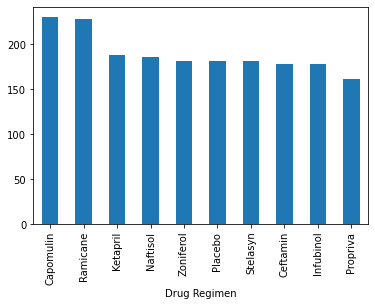

In [53]:
x = df.groupby(["Drug Regimen"])["Timepoint"].count()

x = x.sort_values(ascending = False)


x.plot( kind = "bar")



<BarContainer object of 10 artists>

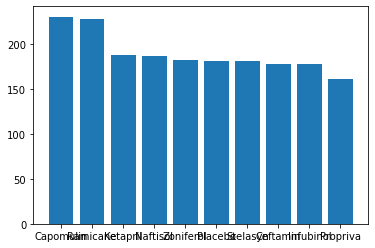

In [59]:
x = df.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending = False)

y_axis = x.tolist()                                             
x_axis = x.index.tolist()

plt.bar(x_axis, y_axis)
#plt.title('Number of Mice per Drug Regimen')
#plt.xlabel('Drug Regimen')
#plt.ylabel('Number of Mice Tested')
#plt.show()

<AxesSubplot:ylabel='Mouse ID'>

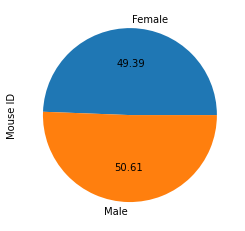

In [66]:
sex = df.groupby(["Sex"])["Mouse ID"].count()

sex.plot(kind= "pie", autopct='%.2f')

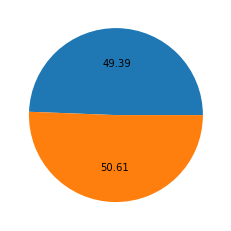

In [69]:
sex = df.groupby(["Sex"])["Mouse ID"].count()

plt.pie(sex, autopct='%.2f')

plt.show()

In [74]:
max_timepoint = df.groupby(["Mouse ID"])["Timepoint"].max()

max_volume = pd.merge(max_timepoint, df, on=["Mouse ID", "Timepoint"], how="left")
max_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [78]:
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_volume_data = []


for treatment in treatment_list:

    
    tumor_volume = max_volume.loc[max_volume['Drug Regimen'] == treatment, "Tumor Volume (mm3)"]
                                
    
    
    tumor_volume_data.append(tumor_volume)  
    
   
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{treatment}: Values below {lower_bound} or above {upper_bound} could be outliers.")
    

Capomulin: Values below 20.70456164999999 or above 51.83201549 could be outliers.
Ramicane: Values below 17.912664470000003 or above 54.30681135 could be outliers.
Infubinol: Values below 36.83290494999999 or above 82.74144559000001 could be outliers.
Ceftamin: Values below 25.355449580000002 or above 87.66645829999999 could be outliers.


In [ ]:
mouse = df.loc[df['Mouse ID']=='b128'].sort_values('Timepoint')

mouse.plot.line(x='Timepoint',
               y='Tumor Volume (mm3)')

plt.title('Tumor Volume for Mouse b128 (Capomulin)')
plt.xlabel('Days')
plt.ylabel('Tumor Volume (mm3)')